Logistic Regression Binary

   satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years Department  \
0                   3              0     1                      0      sales   
1                   6              0     1                      0      sales   
2                   4              0     1                      0      sales   
3                   5              0     1                      0      sales   
4                   3              0     1                      0      sales   

   salary  
0     low  
1  medium  
2 

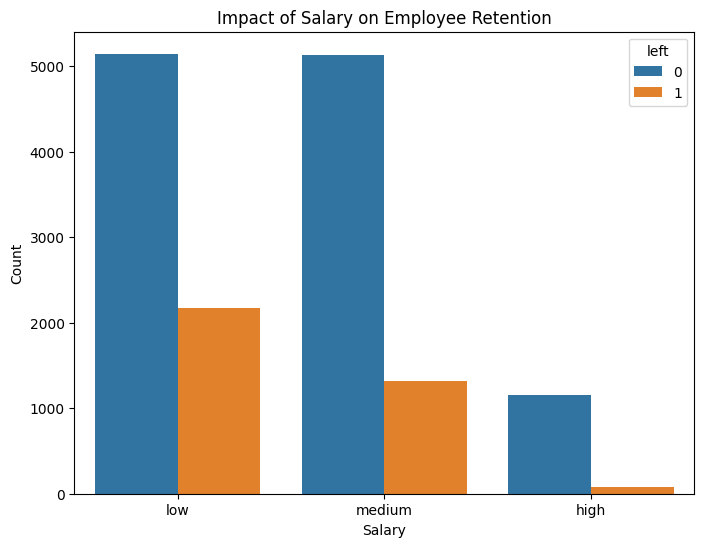

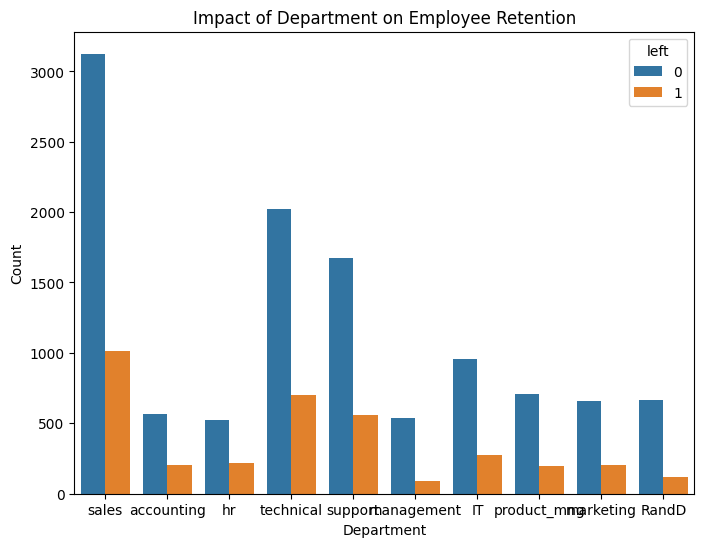

Model Accuracy: 76.70%
Confusion Matrix:
[[2106  160]
 [ 539  195]]
Model Coefficients:
[[-4.08078968  0.53008826 -0.2961727   0.00435081  0.23867844 -0.72043278]]
Prediction for new employee: Stayed


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [7]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# Step 1: Load and inspect the dataset
df = pd.read_csv("/HR_comma_sep.csv")
print(df.head())

# Step 2: Perform Exploratory Data Analysis (EDA)

# Impact of Salary on Retention
plt.figure(figsize=(8,6))
sns.countplot(x='salary', hue='left', data=df)
plt.title('Impact of Salary on Employee Retention')
plt.xlabel('Salary')
plt.ylabel('Count')
plt.show()

# Correlation Between Department and Retention
plt.figure(figsize=(8,6))
sns.countplot(x='Department', hue='left', data=df)
plt.title('Impact of Department on Employee Retention')
plt.xlabel('Department')
plt.ylabel('Count')
plt.show()

# Step 3: Prepare the data for training the Logistic Regression model
# The target variable is 'left', and we will use 'satisfaction_level', 'last_evaluation',
# 'number_project', 'average_montly_hours', 'time_spend_company', 'salary' as predictors.
df['salary'] = df['salary'].map({'low': 0, 'medium': 1, 'high': 2})  # Convert salary to numerical values

# Selecting features and target variable
X = df[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'salary']]
y = df['left']  # Target variable (whether the employee left or not)

# Step 4: Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=10)

# Step 5: Train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Step 6: Make predictions
y_pred = model.predict(X_test)

# Step 7: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Step 8: Interpret model coefficients (optional)
print("Model Coefficients:")
print(model.coef_)

# Step 9: Predict for a new sample (example with sample data)
new_data = [[0.55, 0.65, 6, 250, 3, 1]]  # Example data: satisfaction_level, last_evaluation, number_project, etc.
prediction = model.predict(new_data)
print(f"Prediction for new employee: {'Left' if prediction[0] == 1 else 'Stayed'}")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal_name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  class_type   101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB
None
             hair 

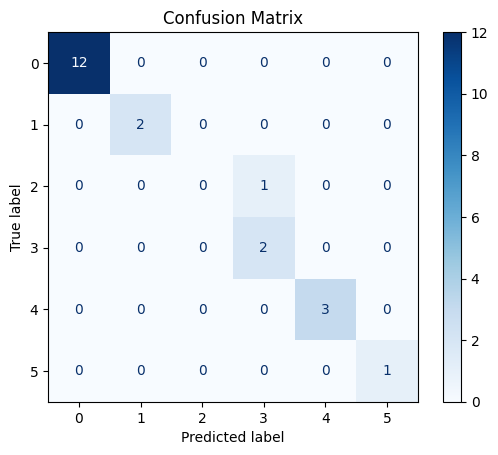

In [16]:
#Implementation – Logistic Regression (Multiclass Classification)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Load datasets

zoo_data_path = "/zoo-data.csv"
class_type_path = '/zoo-class-type.csv'

df = pd.read_csv(zoo_data_path)
class_df = pd.read_csv(class_type_path)

print(df.info())
print(df.describe())
print(df.isnull().sum())
print("-------------------------------------------------------------------------------")

print(class_df.info())
print(class_df.describe())
print(class_df.isnull().sum())
print("-------------------------------------------------------------------------------")


# Merge datasets on class_type
if 'class_type' in df.columns and 'class_type' in class_df.columns:
    df = df.merge(class_df, on='class_type', how='left')

# Drop unnecessary columns (if any)
if 'animal_name' in df.columns:
    df.drop(columns=['animal_name'], inplace=True)

# Separate features and target
X = df.drop(columns=['class_type'])
y = df['class_type']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Build logistic regression model
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# Predict and evaluate accuracy
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()
